In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")


# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train (1).csv")
df.head()

,id,abstract,category,category_num
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7
3,427612,We say that a random integer variable $X$ is...,math-PR,93
4,113852,We derive a formula expressing the joint dis...,math-CO,76


# Data Analysis

In [5]:
df['Abstract_length'] = df['abstract'].str.len()

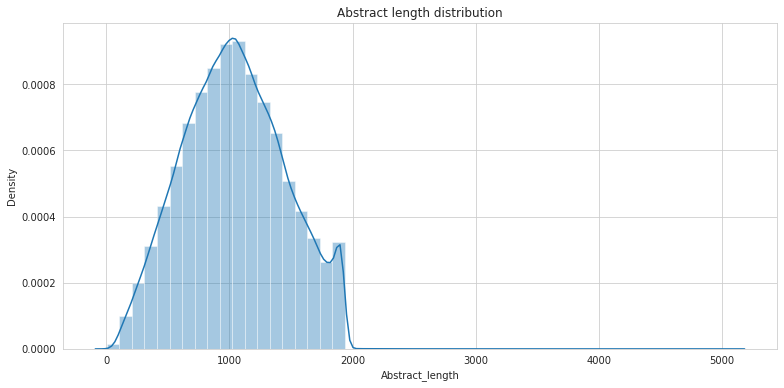

In [6]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['Abstract_length']).set_title('Abstract length distribution');

In [7]:
df['Abstract_length'].describe()

count    390603.000000
mean       1042.640051
std         412.288306
min           6.000000
25%         741.000000
50%        1031.000000
75%        1332.500000
max        5089.000000
Name: Abstract_length, dtype: float64

In [8]:
quantile_97 = df['Abstract_length'].quantile(0.97)
df_97 = df[df['Abstract_length'] < quantile_97]

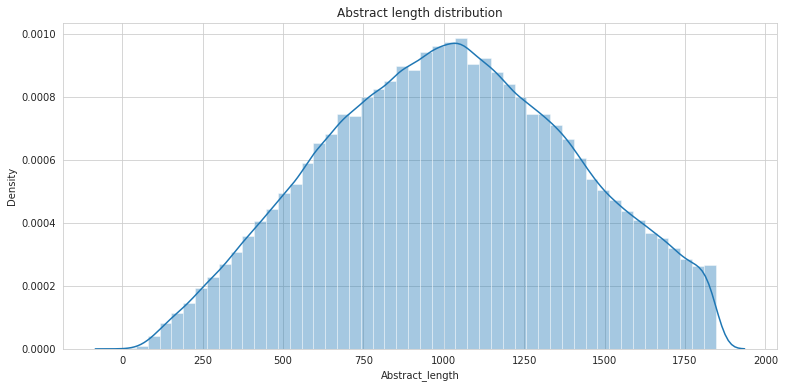

In [9]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_97['Abstract_length']).set_title('Abstract length distribution');

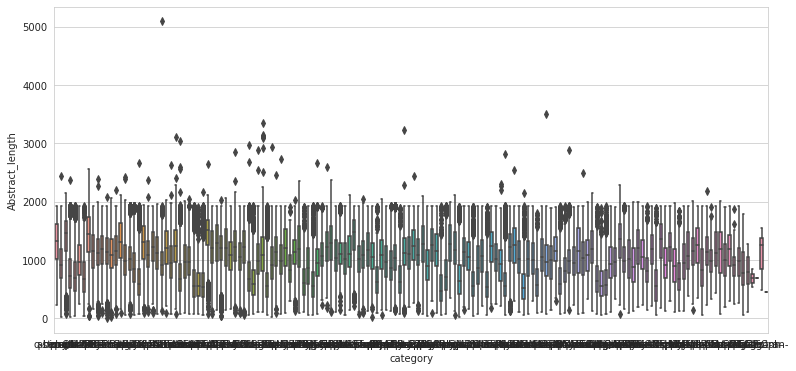

In [10]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='category', y='Abstract_length', width=.5)

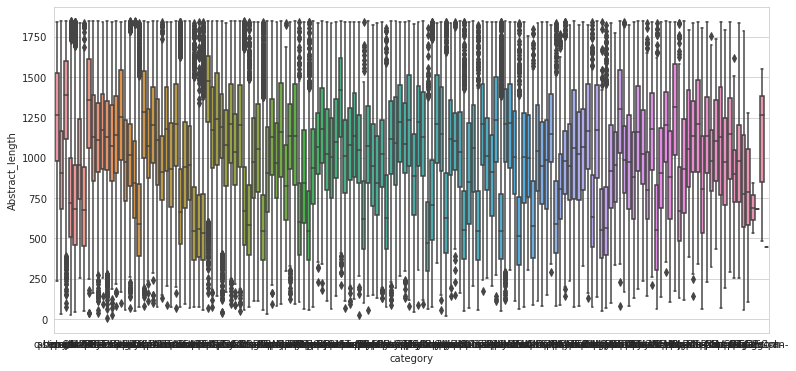

In [11]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_97, x='category', y='Abstract_length');

In [12]:
df.head()

,id,abstract,category,category_num,Abstract_length
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138,1143
1,412276,Accurate knowledge of the thermodynamic prop...,hep-ph-,68,1057
2,256956,The largest X9.3 solar flare in solar cycle ...,astro-ph-SR,7,1604
3,427612,We say that a random integer variable $X$ is...,math-PR,93,811
4,113852,We derive a formula expressing the joint dis...,math-CO,76,518


# Feature Engineering

In [13]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [14]:
## visualize data 
df.loc[1]['abstract']

'  Accurate knowledge of the thermodynamic properties of zero-temperature,\nhigh-density quark matter plays an integral role in attempts to constrain the\nbehavior of the dense QCD matter found inside neutron-star cores, irrespective\nof the phase realized inside the stars. In this Letter, we consider the\nweak-coupling expansion of the dense QCD equation of state and compute the\nnext-to-next-to-next-to-leading-order contribution arising from the non-Abelian\ninteractions among long-wavelength, dynamically screened gluonic fields.\nAccounting for these interactions requires an all-loop resummation, which can\nbe performed using hard-thermal-loop (HTL) kinematic approximations.\nConcretely, we perform a full two-loop computation using the HTL effective\ntheory, valid for the long-wavelegth, or soft, modes. We find that the soft\nsector is well-behaved within cold quark matter, contrary to the case\nencountered at high temperatures, and find that the new contribution decreases\nthe reno

# 1. Text cleaning and preparation

In [15]:
# Text cleaning and preparation

# cleaning \r and \n
df['Abstract_Parsed_1'] = df['abstract'].str.replace("\r", " ")
df['Abstract_Parsed_1'] = df['Abstract_Parsed_1'].str.replace("\n", " ")
df['Abstract_Parsed_1'] = df['Abstract_Parsed_1'].str.replace("    ", " ")  

In [16]:
df['Abstract_Parsed_1'] = df['Abstract_Parsed_1'].str.replace('"', '')

In [17]:
# cleaning upcase downcase
# Lowercasing the text
df['Abstract_Parsed_2'] = df['Abstract_Parsed_1'].str.lower()

In [18]:
#cleaning punctuation signs 
punctuation_signs = list("?:!.,;")
df['Abstract_Parsed_3'] = df['Abstract_Parsed_2']

for punct_sign in punctuation_signs:
    df['Abstract_Parsed_3'] = df['Abstract_Parsed_3'].str.replace(punct_sign, '')

In [19]:
#cleaning possessive pronouns
df['Abstract_Parsed_4'] = df['Abstract_Parsed_3'].str.replace("'s", "")

In [20]:
#stop words

# Downloading the stop words list
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [22]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [23]:
df['Abstract_Parsed_5'] = df['Abstract_Parsed_4']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Abstract_Parsed_5'] = df['Abstract_Parsed_5'].str.replace(regex_stopword, '')

In [24]:
df.loc[1]['Abstract_Parsed_5']

'  accurate knowledge   thermodynamic properties  zero-temperature high-density quark matter plays  integral role  attempts  constrain  behavior   dense qcd matter found inside neutron-star cores irrespective   phase realized inside  stars   letter  consider  weak-coupling expansion   dense qcd equation  state  compute  next--next--next--leading-order contribution arising   non-abelian interactions among long-wavelength dynamically screened gluonic fields accounting   interactions requires  -loop resummation    performed using hard-thermal-loop (htl) kinematic approximations concretely  perform  full two-loop computation using  htl effective theory valid   long-wavelegth  soft modes  find   soft sector  well-behaved within cold quark matter contrary   case encountered  high temperatures  find   new contribution decreases  renormalization-scale dependence   equation  state  high density '

In [25]:
df.head(1)

,id,abstract,category,category_num,Abstract_length,Abstract_Parsed_1,Abstract_Parsed_2,Abstract_Parsed_3,Abstract_Parsed_4,Abstract_Parsed_5
0,271675,Bacteria are often exposed to multiple stimu...,q-bio-QM,138,1143,Bacteria are often exposed to multiple stimu...,bacteria are often exposed to multiple stimu...,bacteria are often exposed to multiple stimu...,bacteria are often exposed to multiple stimu...,bacteria often exposed multiple stimuli c...


In [26]:
list_columns = ["id", "category", "category_num", "abstract", "Abstract_Parsed_5"]
df = df[list_columns]

df = df.rename(columns={'Abstract_Parsed_5': 'Abstract_Parsed'})

# Cleaned Data

In [27]:
df.head()

,id,category,category_num,abstract,Abstract_Parsed
0,271675,q-bio-QM,138,Bacteria are often exposed to multiple stimu...,bacteria often exposed multiple stimuli c...
1,412276,hep-ph-,68,Accurate knowledge of the thermodynamic prop...,accurate knowledge thermodynamic propertie...
2,256956,astro-ph-SR,7,The largest X9.3 solar flare in solar cycle ...,largest x93 solar flare solar cycle 24 p...
3,427612,math-PR,93,We say that a random integer variable $X$ is...,say random integer variable $x$ monotone...
4,113852,math-CO,76,We derive a formula expressing the joint dis...,derive formula expressing joint distribut...
